<a href="https://colab.research.google.com/github/shaya-686/AI/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv(
    'https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/bike_sales.csv',
    index_col = "Unnamed: 0",
    parse_dates=['Date'])

In [3]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# Завдання 1
Виведіть середнє значення та медіану для `order_quantity`. Чи є викиди?

In [39]:
sales.rename(columns=str.lower, inplace=True)
sales.columns
sales['order_quantity'].dtype
sales_mean = sales['order_quantity'].mean()
sales_median = sales['order_quantity'].median()
print(f"mean = {sales_mean}, mediana = {sales_median}")

sales.describe()


mean = 11.901659648253654, mediana = 10.0


,date,day,year,customer_age,order_quantity,unit_cost,unit_price,profit,cost,revenue
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014-11-23 12:14:55.063519232,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
min,2011-01-01 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013-12-22 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,2014-06-27 00:00:00,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,2016-01-09 00:00:00,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000
std,NaN,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674


# Завдання 2
Намалюйте гістограму та ящик з вусами для `order_quantity`

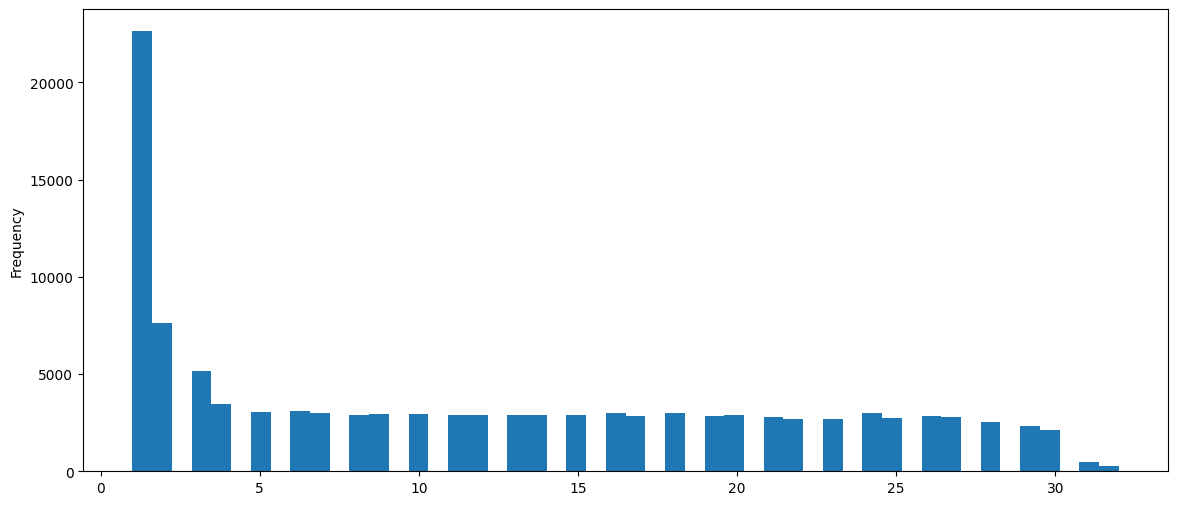

In [34]:
ax = sales['order_quantity'].plot(
    kind = 'hist',
    bins = 50,
    figsize = (14,6)
)


<Axes: >

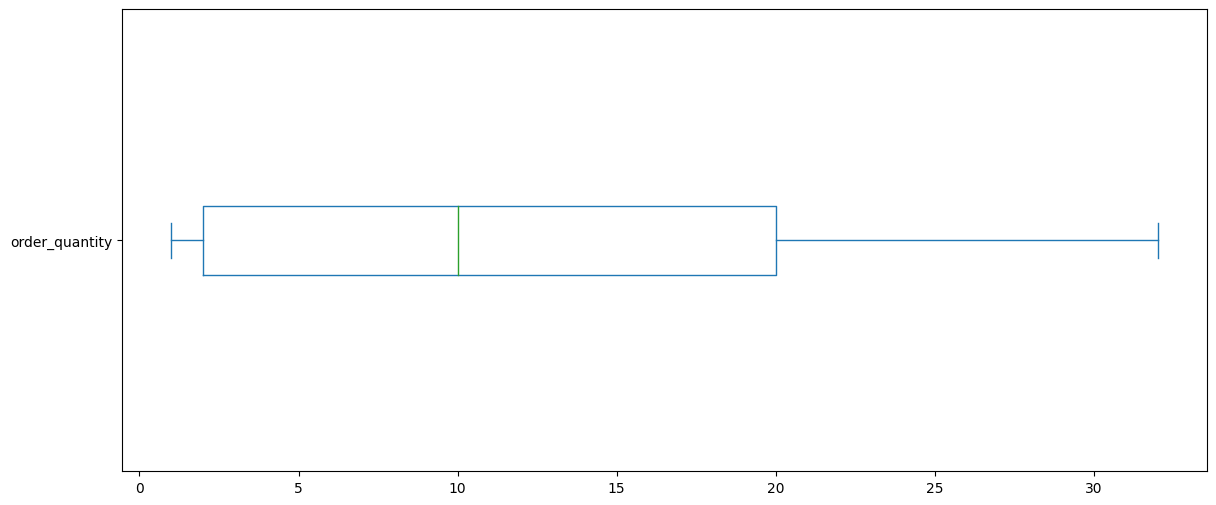

In [20]:
sales['order_quantity'].plot(kind='box', vert=False, figsize=(14,6))

# Завдання 3
Очистіть дані від викидів. Алгоритм:

1. Обчислюємо нижній `q1` та верхній `q3` квантилі
2. Обчислюємо медіану `median`
3. Очислюємо значення `IQR = q3 - q1`
4. Обчислюємо `lower = q1 - 1.5*IQR`
5. Обчислюємо `upper = q3 + 1.5*IQR`
6. Викидами вважаємо значення які `< lower` або `>upper`

In [31]:
print("Original shape: ", sales.shape)
def remove_outliers(df, column_name):
  q1 = df[column_name].quantile(q=0.25)
  q3 = df[column_name].quantile(q=0.75)

  IQR = q3 - q1
  lower = q1 - 1.5*IQR
  upper = q3 + 1.5*IQR
  #print(q1, q3, IQR, lower, upper)

  mask = (df[column_name] >= lower) & (df[column_name] <= upper)
  return df[mask]

#remove_outliers(sales, 'order_quantity')
sales1 = sales.copy()

for column_name in sales1.columns:
  if sales1.dtypes[column_name] in ("object", "datetime64[ns]"):
    continue

  sales1 = remove_outliers(sales1, column_name)

print("Sales shape after remove values: ", sales1.shape)

Original shape:  (113036, 18)
Sales shape after remove values:  (67414, 18)


<Axes: >

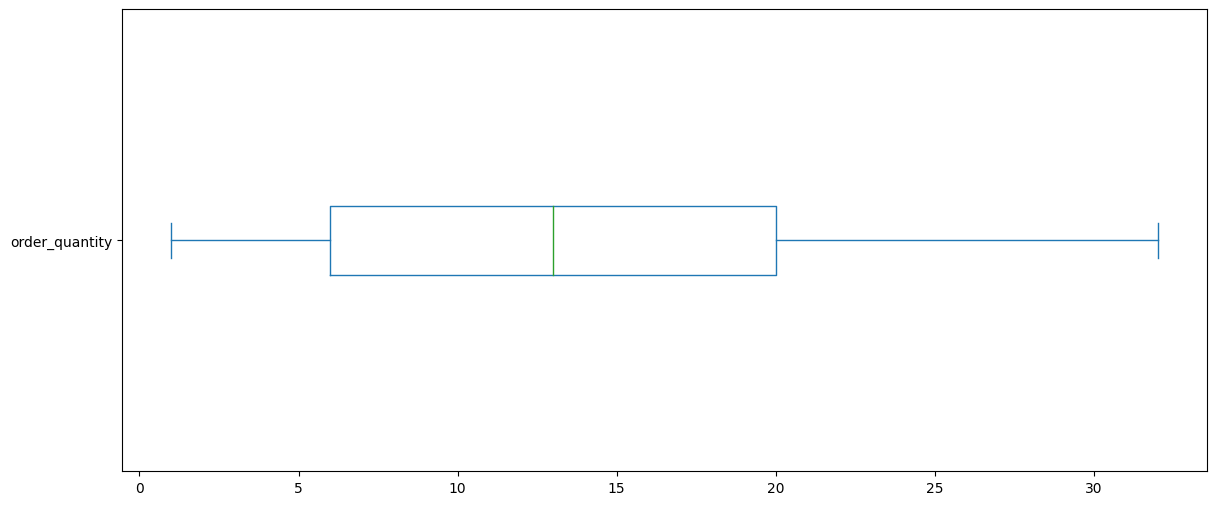

In [32]:
sales1['order_quantity'].plot(kind='box', vert=False, figsize=(14,6))

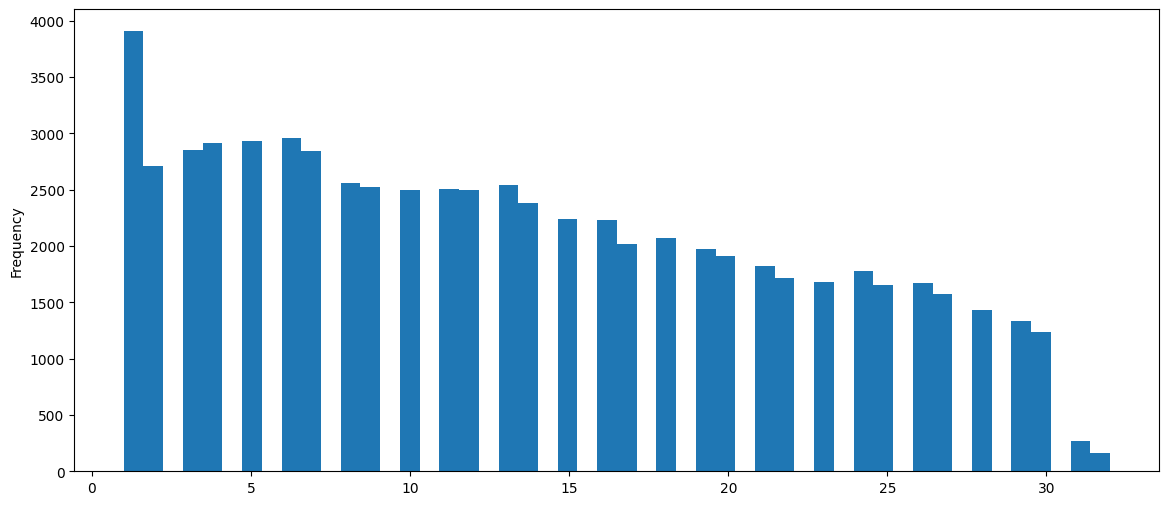

In [35]:
ax = sales1['order_quantity'].plot(
    kind = 'hist',
    bins = 50,
    figsize = (14,6)
)

# Завдання 4
Ввиведіть гістограму з кількістю чоловіків та жінок серед покупців.

# Завдання 5
Виведіть точкову діаграму для ознак `order_quantity` та `revenue`

# Завдання 6
Знайдіть категоріальну характеристику, від якої залежить ознака `profit`